### 넘파이 Chapter 10
- 방정식 알아보기
- 차분, 미분과 적분
- 합성곱 및 필터링 알아보기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

- 1-1 방정식 처리 알아보기

In [2]:
# 방정식 알아보기
# x **2 + 2*x + 1
af = np.array([1, -2, 1])
af

array([ 1, -2,  1])

In [3]:
p = np.poly1d(af)
p

poly1d([ 1, -2,  1])

In [4]:
print(p)    # 방정식을 보여줌

   2
1 x - 2 x + 1


In [5]:
type(p) # 방정식을 만들어 주나봐

numpy.poly1d

In [6]:
p.variable, p.order

('x', 2)

In [7]:
p.coef, p.coefficients, p.coeffs

(array([ 1, -2,  1]), array([ 1, -2,  1]), array([ 1, -2,  1]))

In [8]:
p.roots, p(0)

(array([1.+6.68896751e-09j, 1.-6.68896751e-09j]), np.int64(1))

In [9]:
np.roots(af), np.polyval([1,-2,1], 0), np.polyval([1, -2, 1], 5)    # 방정식의 값을 계산하기

(array([1.+6.68896751e-09j, 1.-6.68896751e-09j]), np.int64(1), np.int64(16))

In [10]:
# 다항식 수식 알아보기
np.poly1d([1,2]) + np.poly1d([1,-2])

poly1d([2, 0])

In [11]:
np.poly1d([1,2]) * np.poly1d([1,-2])

poly1d([ 1,  0, -4])

In [12]:
np.poly1d([1, -4, 4]) / np.poly1d([1, -2])

(poly1d([ 1., -2.]), poly1d([0.]))

In [13]:
# 다항식의 계수를 ploy 함수로 생성하기
a = np.poly((1, ))
a

array([ 1., -1.])

In [14]:
a_ = np.poly1d(a)
a_.order, a_.roots

(1, array([1.]))

In [15]:
b = np.poly((1,1 ))
b

array([ 1., -2.,  1.])

In [16]:
np.poly1d(b).roots

array([1.+6.68896751e-09j, 1.-6.68896751e-09j])

In [17]:
c = np.poly((2,2 ))
c

array([ 1., -4.,  4.])

In [18]:
np.poly1d(c).roots

array([2.+1.3377935e-08j, 2.-1.3377935e-08j])

In [19]:
d = np.poly((1,1,1 ))
d

array([ 1., -3.,  3., -1.])

In [20]:
np.poly1d(d).roots

array([1.00000205+3.55693933e-06j, 1.00000205-3.55693933e-06j,
       0.99999589+0.00000000e+00j])

In [21]:
#  다항식을 사용해서 그래프 그리기
t = np.arange(0, 10, 0.01)
y = 3*t + 5
y_noise = y + np.random.randn(len(y))

In [22]:
fp1 = np.polyfit(t, y_noise, 1)
f1 = np.poly1d(fp1)
fp1, f1

(array([2.98501145, 5.04396667]), poly1d([2.98501145, 5.04396667]))

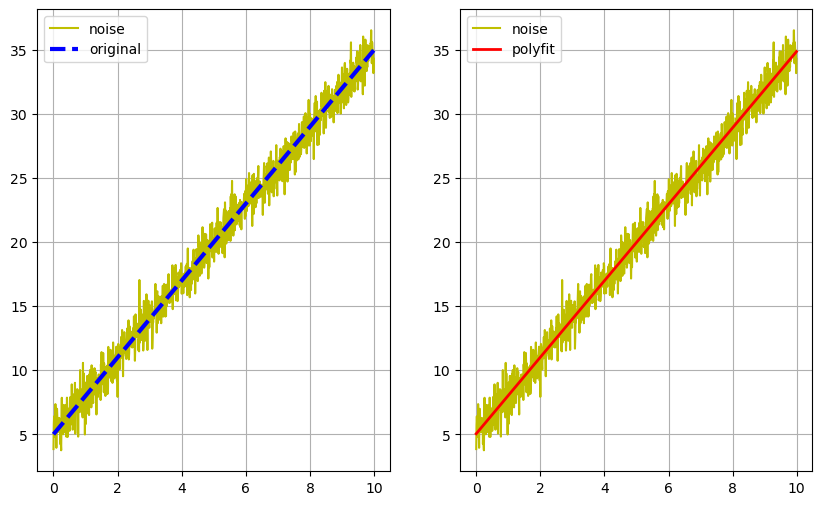

In [23]:
fig, axes = plt.subplots(1,2, figsize=(10, 6))
axes[0].plot(t, y_noise, label='noise', color='y')
axes[0].plot(t, y, ls='dashed', lw=3, color='b', label='original')
axes[0].legend()
axes[0].grid()
axes[1].plot(t, y_noise, label='noise', color='y')
axes[1].plot(t, f1(t), lw=2, color='r', label='polyfit')
axes[1].legend()
axes[1].grid()
plt.show()

- 1-2 연립 방정식 이해하기

In [24]:
# 연립 방정식 풀기
a = np.array([[3,1], [1,2]])
b = np.array([9,8])
x = np.linalg.solve(a, b)
x

array([2., 3.])

In [25]:
np.allclose(np.dot(a, x), b)

True

In [26]:
A = np.array( [[1,0,0],[1,1,1],[6,7,0]])
b =np.array([0,24,0])
A_1 = np.linalg.inv(A)
A_1

array([[ 1.00000000e+00,  0.00000000e+00, -2.31296463e-17],
       [-8.57142857e-01, -0.00000000e+00,  1.42857143e-01],
       [-1.42857143e-01,  1.00000000e+00, -1.42857143e-01]])

In [27]:
x = np.dot(A_1, b)
x

array([ 0.,  0., 24.])

In [28]:
np.allclose(np.dot(A_1, b), x)

True

In [29]:
np.linalg.solve(A, b)

array([ 0., -0., 24.])

In [30]:
np.allclose(np.dot(A_1, b), x)

True

In [31]:
# lstsq 함수로 연립 방정식 풀기
np.linalg.matrix_rank(A)

np.int64(3)

In [32]:
x, resid, rank, singulr = np.linalg.lstsq(A,b, rcond=-1)
x

array([ 3.05504346e-15, -2.34438214e-15,  2.40000000e+01])

In [33]:
np.allclose(np.dot(A, x), b)

True

In [34]:
np.linalg.norm(A @ x - b)

np.float64(3.6080604163105106e-15)

In [35]:
np.allclose(np.linalg.norm(A @ x - b) , 0)

True

In [36]:
resid

array([], dtype=float64)

In [37]:
u, s_, vh = np.linalg.svd(A, full_matrices=True)
s_

array([9.3509151 , 1.        , 0.74858984])

In [38]:
singulr

array([9.3509151 , 1.        , 0.74858984])

- 2-1 diff 함수로 미분 알아보기

In [39]:
# 원소간의 차이를 구하기
x = np.array([1, 2, 4, 7, 10])
x

array([ 1,  2,  4,  7, 10])

In [40]:
np.diff(x)

array([1, 2, 3, 3])

In [41]:
for i in range(len(x)-1) :
    print(x[i+1] - x[i])

1
2
3
3


In [42]:
np.diff(x, n=2)

array([1, 1, 0])

In [43]:
c = np.diff(x)
np.diff(c)

array([1, 1, 0])

In [44]:
# 차분으로 미분하기
x = np.array([1,2,3,4,5,6])
dx = np.diff(x)
dx

array([1, 1, 1, 1, 1])

In [45]:
y = np.array([2,4,6,8,10,12])
dy = np.diff(y)
dy

array([2, 2, 2, 2, 2])

In [46]:
dydx = np.zeros(y.shape, float)
dydx[:-1] = dy/dx
dydx

array([2., 2., 2., 2., 2., 0.])

In [47]:
dydx[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])
dydx

array([2., 2., 2., 2., 2., 2.])

In [48]:
np.gradient(y)

array([2., 2., 2., 2., 2., 2.])

In [49]:
# 차분으로 sin 함수 미분하기
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

In [50]:
dy = np.zeros(y.shape, float)
dy[: -1] = np.diff(y)/np.diff(x)
dy[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

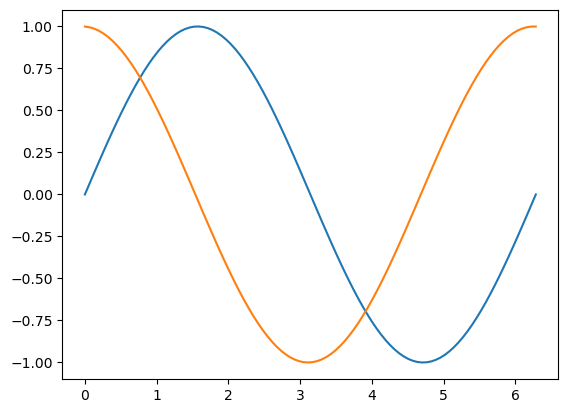

In [51]:
plt.plot(x,y)
plt.plot(x,dy)
plt.show()

- 2-2 gradient 함수로 미분 알아보기

In [52]:
# 다항식 미분 알아보기
a = np.array([1,-2,1])
p = np.poly1d(a)
print(p)

   2
1 x - 2 x + 1


In [53]:
d = np.polyder(p)
d

poly1d([ 2, -2])

In [54]:
d(10)

np.int64(18)

In [55]:
# 중앙 차분으로 미분 알아보기
x= 10

In [56]:
def f(x):
    return x**2

In [57]:
def numerical_differentiation(f, x):    # 수치미분
    delta_x = 1e-7    # 0.0000001
    return (f(x+delta_x) - f(x-delta_x)) / (delta_x*2)  # 중앙 차분

In [58]:
nd = numerical_differentiation(f, x)
nd

19.99999987845058

In [59]:
a = np.array([1,0,0])
p = np.poly1d(a)
p

poly1d([1, 0, 0])

In [60]:
s = np.polyder(p)
s, s(10)

(poly1d([2, 0]), np.int64(20))

In [61]:
np.allclose(nd, s(10))

True

In [62]:
# gradient 알아보기
f = np.array([ 1, 2, 4, 10, 13, 20])

In [63]:
[(f[1]-f[0]), 
 ((f[1]-f[0])+(f[2] -f[1]))/2, 
 ((f[2]-f[1])+(f[3] -f[2]))/2 ,  
 ((f[3]-f[2])+(f[4] -f[3]))/2,  
 ((f[4]-f[3])+(f[5] -f[4]))/2, 
 (f[5] -f[4])]

[np.int64(1),
 np.float64(1.5),
 np.float64(4.0),
 np.float64(4.5),
 np.float64(5.0),
 np.int64(7)]

In [64]:
np.gradient(f)

array([1. , 1.5, 4. , 4.5, 5. , 7. ])

In [65]:
[(f[1]-f[0])/2, 
 ((f[1]-f[0])+(f[2] -f[1]))/4, 
 ((f[2]-f[1])+(f[3] -f[2]))/4 ,  
 ((f[3]-f[2])+(f[4] -f[3]))/4,  
 ((f[4]-f[3])+(f[5] -f[4]))/4, 
 (f[5] -f[4])/2]

[np.float64(0.5),
 np.float64(0.75),
 np.float64(2.0),
 np.float64(2.25),
 np.float64(2.5),
 np.float64(3.5)]

In [66]:
np.gradient(f, 2)

array([0.5 , 0.75, 2.  , 2.25, 2.5 , 3.5 ])

In [67]:
x = np.linspace(0,10)
x

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [68]:
x.shape

(50,)

In [69]:
y = (x**2) +1
y.shape

(50,)

In [70]:
y

array([  1.        ,   1.04164931,   1.16659725,   1.37484382,
         1.666389  ,   2.04123282,   2.49937526,   3.04081633,
         3.66555602,   4.37359434,   5.16493128,   6.03956685,
         6.99750104,   8.03873386,   9.16326531,  10.37109538,
        11.66222407,  13.0366514 ,  14.49437734,  16.03540192,
        17.65972511,  19.36734694,  21.15826739,  23.03248646,
        24.99000416,  27.03082049,  29.15493544,  31.36234902,
        33.65306122,  36.02707205,  38.48438151,  41.02498959,
        43.64889629,  46.35610162,  49.14660558,  52.02040816,
        54.97750937,  58.0179092 ,  61.14160766,  64.34860475,
        67.63890046,  71.01249479,  74.46938776,  78.00957934,
        81.63306955,  85.33985839,  89.12994586,  93.00333195,
        96.96001666, 101.        ])

In [71]:
np.gradient(y,2)

array([0.02082466, 0.04164931, 0.08329863, 0.12494794, 0.16659725,
       0.20824656, 0.24989588, 0.29154519, 0.3331945 , 0.37484382,
       0.41649313, 0.45814244, 0.49979175, 0.54144107, 0.58309038,
       0.62473969, 0.666389  , 0.70803832, 0.74968763, 0.79133694,
       0.83298626, 0.87463557, 0.91628488, 0.95793419, 0.99958351,
       1.04123282, 1.08288213, 1.12453145, 1.16618076, 1.20783007,
       1.24947938, 1.2911287 , 1.33277801, 1.37442732, 1.41607663,
       1.45772595, 1.49937526, 1.54102457, 1.58267389, 1.6243232 ,
       1.66597251, 1.70762182, 1.74927114, 1.79092045, 1.83256976,
       1.87421908, 1.91586839, 1.9575177 , 1.99916701, 2.01999167])

In [72]:
dx = x[1]-x[0]
dydx = np.gradient(y, dx)
dydx

array([ 0.20408163,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 19.79591837])

In [73]:
from scipy.interpolate import InterpolatedUnivariateSpline

In [74]:
f = InterpolatedUnivariateSpline(x, y, k=1)
dfdx = f.derivative()
dydx = dfdx(x)

dydx

array([ 0.20408163,  0.6122449 ,  1.02040816,  1.42857143,  1.83673469,
        2.24489796,  2.65306122,  3.06122449,  3.46938776,  3.87755102,
        4.28571429,  4.69387755,  5.10204082,  5.51020408,  5.91836735,
        6.32653061,  6.73469388,  7.14285714,  7.55102041,  7.95918367,
        8.36734694,  8.7755102 ,  9.18367347,  9.59183673, 10.        ,
       10.40816327, 10.81632653, 11.2244898 , 11.63265306, 12.04081633,
       12.44897959, 12.85714286, 13.26530612, 13.67346939, 14.08163265,
       14.48979592, 14.89795918, 15.30612245, 15.71428571, 16.12244898,
       16.53061224, 16.93877551, 17.34693878, 17.75510204, 18.16326531,
       18.57142857, 18.97959184, 19.3877551 , 19.79591837, 19.79591837])

In [75]:
di_dx = np.diff(x)
di_dy = np.diff(y)
di_dy/di_dx

array([ 0.20408163,  0.6122449 ,  1.02040816,  1.42857143,  1.83673469,
        2.24489796,  2.65306122,  3.06122449,  3.46938776,  3.87755102,
        4.28571429,  4.69387755,  5.10204082,  5.51020408,  5.91836735,
        6.32653061,  6.73469388,  7.14285714,  7.55102041,  7.95918367,
        8.36734694,  8.7755102 ,  9.18367347,  9.59183673, 10.        ,
       10.40816327, 10.81632653, 11.2244898 , 11.63265306, 12.04081633,
       12.44897959, 12.85714286, 13.26530612, 13.67346939, 14.08163265,
       14.48979592, 14.89795918, 15.30612245, 15.71428571, 16.12244898,
       16.53061224, 16.93877551, 17.34693878, 17.75510204, 18.16326531,
       18.57142857, 18.97959184, 19.3877551 , 19.79591837])

In [76]:
# 차원별로 gradient 처리하기
a = np.array([[4,5,6],[3,4,5]])
adx = np.gradient(a)
adx[0], adx[1]

(array([[-1., -1., -1.],
        [-1., -1., -1.]]),
 array([[1., 1., 1.],
        [1., 1., 1.]]))

In [77]:
x,y,z = np.mgrid[-100:101:25., -100:101:25., -100:101:25.]
V = 2*x**2 + 3*y**2 - 4*z
Ex,Ey,Ez = np.gradient(V)
Ex.shape, Ey.shape, Ez.shape

((9, 9, 9), (9, 9, 9), (9, 9, 9))

- 2-3 적분

In [78]:
# 기본 적분 알아보기
a = np.array([1,-2,1])
a

array([ 1, -2,  1])

In [79]:
p = np.poly1d(a)
p

poly1d([ 1, -2,  1])

In [80]:
print(p)

   2
1 x - 2 x + 1


In [81]:
d = np.polyint(a) 
d

array([ 0.33333333, -1.        ,  1.        ,  0.        ])

In [82]:
print(np.poly1d(d))

        3     2
0.3333 x - 1 x + 1 x


In [83]:
x2 = np.arange(5)
x2

array([0, 1, 2, 3, 4])

In [84]:
y2 = x2**2
np.trapz(y2,x=x2)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26216\1311319922.py:2: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  np.trapz(y2,x=x2)


np.float64(22.0)

In [85]:
x = np.array([0, 0.5, 1, 1.5, 2])
y = x**3

x2 = np.linspace(0, 2,100)
y2 = x2**3

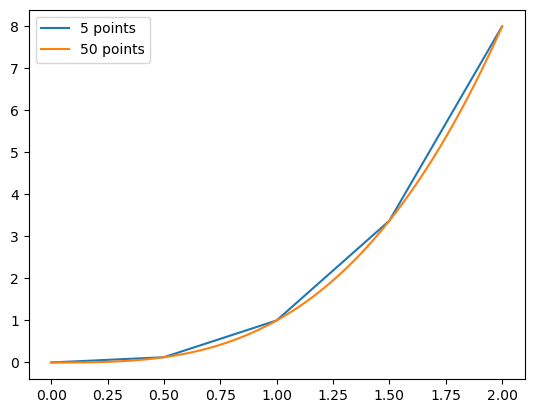

In [86]:
plt.plot(x, y, label='5 points')
plt.plot(x2, y2, label='50 points')
plt.legend()
plt.show()

In [87]:
np.trapezoid(y, x), np.trapezoid(y2, x2)

(np.float64(4.25), np.float64(4.000408121620243))

In [88]:
# quad 방식으로 적분아기
from scipy.integrate import quad

In [89]:
x2 = lambda x: x**2
quad(x2, 0, 4)

(21.333333333333336, 2.368475785867001e-13)

In [90]:
f = lambda x,a : a*x
y, err = quad(f, 0, 1, args=(1,))
y

0.5

In [91]:
func = lambda x: np.cos(np.exp(x)) ** 2
y, err = quad(func,1,3)
y

1.0829625047031528

In [92]:
x = [0, 0.5, 1, 1.5, 2]
y = [0,    0.1250,    1.0000,    3.3750,    8.0000]
np.trapezoid(y, x)

np.float64(4.25)

In [93]:
from scipy.interpolate import interp1d

In [94]:
f = interp1d(x, y)
f.fill_value

array(nan)

In [95]:
xfine = np.linspace(0., 2.)
yfine = f(xfine)
print(np.trapezoid(yfine, xfine))

4.251561849229487


In [96]:
yfine.shape

(50,)

In [97]:
ans, err = quad(f, 0., 2.)
print(ans)

4.25


- 3-1 1차원 배열 합성곱 처리

In [98]:
# convolve 함수 처리
a = np.array([0, 1, 2, 3, 4, 5, 6])
v = np.array([0.2, 0.7])
same = np.convolve(a,v, mode='same')
same.shape, same

((7,), array([0. , 0.2, 1.1, 2. , 2.9, 3.8, 4.7]))

In [99]:
a_ = np.array([0,0, 1, 2, 3, 4, 5,6])
v_ = np.roll(v,1)
v_

array([0.7, 0.2])

In [100]:
np.dot([0,0], v_)

np.float64(0.0)

In [101]:
np.dot([0,1], v_)

np.float64(0.2)

In [102]:
ll = []
for i in range(7) :
    ll.append(np.dot(a_[i : i+2], v_).tolist())
ll

[0.0, 0.2, 1.1, 2.0, 2.8999999999999995, 3.8, 4.7]

In [103]:
np.allclose(same, ll)

True

In [104]:
full = np.convolve(a,v, mode='full')
full.shape, full

((8,), array([0. , 0.2, 1.1, 2. , 2.9, 3.8, 4.7, 4.2]))

In [105]:
ll = []
a__ = np.array([0,0, 1, 2, 3, 4, 5,6,0])
for i in range(8) :
    ll.append(np.dot(a__[i : i+2], v_).tolist())
ll

[0.0, 0.2, 1.1, 2.0, 2.8999999999999995, 3.8, 4.7, 4.199999999999999]

In [106]:
valid = np.convolve(a,v, mode='valid')
valid.shape, valid

((6,), array([0.2, 1.1, 2. , 2.9, 3.8, 4.7]))

In [107]:
ll = []
a___ = np.array([0, 1, 2, 3, 4, 5,6])
for i in range(6) :
    ll.append(np.dot(a___[i : i+2], v_).tolist())
ll

[0.2, 1.1, 2.0, 2.8999999999999995, 3.8, 4.7]

In [108]:
w = np.array([1,3,3,0])
x = np.array([2,4,6,8,0,8,0])
w_r = np.flip(w)
w_r

array([0, 3, 3, 1])

In [109]:
np.correlate(x, w_r,mode='same')

array([10, 24, 38, 42, 32, 24, 24])

In [110]:
np.convolve(x,w, mode='same')

array([10, 24, 38, 42, 32, 24, 24])

In [111]:
np.correlate(x, w,mode='same')

array([ 6, 18, 32, 46, 30, 32, 24])

In [112]:
np.convolve(x,w_r, mode='same')

array([ 6, 18, 32, 46, 30, 32, 24])

- 3-2 2차원 배열 합성곱 처리

In [113]:
# convolve 2차원 처리하기
A= [[5, 4, 5, 4],
    [3 ,2, 3 , 2], 
    [5 , 4, 5, 4],
    [3 ,2 ,3 , 2 ]]
A = np.array(A)
k = np.array([0.707, 0.707])

In [114]:
C = np.zeros((4,5))
for i in range(4) :
    C[i] = np.convolve(A[i],k, mode='full')
C

array([[3.535, 6.363, 6.363, 6.363, 2.828],
       [2.121, 3.535, 3.535, 3.535, 1.414],
       [3.535, 6.363, 6.363, 6.363, 2.828],
       [2.121, 3.535, 3.535, 3.535, 1.414]])

In [115]:
k_ = np.array([0.707, 0.707]).reshape(1,2)
A.shape, k_.shape

((4, 4), (1, 2))

In [116]:
from scipy import signal

In [117]:
grad = signal.convolve2d(A, k_, boundary='fill', mode='full')
grad.shape, grad

((4, 5),
 array([[3.535, 6.363, 6.363, 6.363, 2.828],
        [2.121, 3.535, 3.535, 3.535, 1.414],
        [3.535, 6.363, 6.363, 6.363, 2.828],
        [2.121, 3.535, 3.535, 3.535, 1.414]]))

In [118]:
x = np.array([[1, 1, 1, 0, 0],
              [0, 1, 1, 1, 0],
              [0, 0, 1, 1, 1],
              [0, 0, 1, 1, 0],
              [0, 1, 1, 0, 0]],dtype='float')
w_k = np.array([[1, 0, 1],
               [0, 1, 0],
               [1, 0, 1],],dtype='float')
x.shape, w_k.shape

((5, 5), (3, 3))

In [119]:
f = signal.convolve2d(x, w_k, 'valid')
f.shape, f

((3, 3),
 array([[4., 3., 4.],
        [2., 4., 3.],
        [2., 3., 4.]]))

In [120]:
fs = signal.convolve2d(x, w_k, 'same')
fs.shape, fs

((5, 5),
 array([[2., 2., 3., 1., 1.],
        [1., 4., 3., 4., 1.],
        [1., 2., 4., 3., 3.],
        [1., 2., 3., 4., 1.],
        [0., 2., 2., 1., 1.]]))

In [121]:
fl = signal.convolve2d(x, w_k, 'full')
fl.shape, fl

((7, 7),
 array([[1., 1., 2., 1., 1., 0., 0.],
        [0., 2., 2., 3., 1., 1., 0.],
        [1., 1., 4., 3., 4., 1., 1.],
        [0., 1., 2., 4., 3., 3., 0.],
        [0., 1., 2., 3., 4., 1., 1.],
        [0., 0., 2., 2., 1., 1., 0.],
        [0., 1., 1., 1., 1., 0., 0.]]))

In [122]:
# 이미지 처리 알아보기
from scipy import misc
from scipy import datasets

c:\Users\PC\anaconda3\envs\kdt6\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [123]:
face = datasets.face(gray=True)
face.shape

(768, 1024)

In [124]:
import warnings
warnings.filterwarnings('ignore')

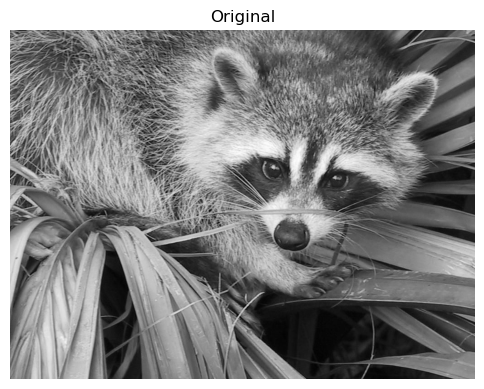

In [133]:
fig, ax_orig = plt.subplots(1, 1, figsize=(6, 15))
ax_orig.imshow(face, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
plt.show()

In [127]:
scharr = np.array([[ -3-3j, 0-10j,  +3 -3j],
                   [-10+0j, 0+ 0j, +10 +0j],
                   [ -3+3j, 0+10j,  +3 +3j]])
grad = signal.convolve2d(face, scharr, boundary='symm', mode='same')
grad.shape, grad[0]

((768, 1024),
 array([-271.+481.j, -523.+419.j, -299.+349.j, ..., -244. +16.j,
        -318. -74.j, -140.-132.j]))

In [128]:
np.abs(grad[0,0]), np.absolute(grad[0,0]), np.absolute(grad[0])

(np.float64(552.0887609796091),
 np.float64(552.0887609796091),
 array([552.08876098, 670.14177604, 459.56718769, ..., 244.52402745,
        326.49655435, 192.41621553]))

In [129]:
np.angle(grad[0,0]), np.angle(grad[0,0], deg=True), np.angle(grad[0])

(np.float64(2.0838764628714874),
 np.float64(119.39732634918663),
 array([ 2.08387646,  2.46615257,  2.27918658, ...,  3.07611263,
        -2.91295726, -2.38559778]))

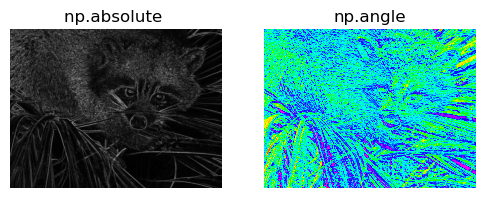

In [132]:
fig, (ax_mag, ax_ang) = plt.subplots(1, 2, figsize=(6, 15))
ax_mag.imshow(np.absolute(grad), cmap='gray')
ax_mag.set_title('np.absolute ')
ax_mag.set_axis_off()
ax_ang.imshow(np.angle(grad), cmap='hsv') # hsv is cyclic, like angles
ax_ang.set_title('np.angle')
ax_ang.set_axis_off()
plt.show()

- 3-3 필터링과 풀링 알아보기

In [136]:
# 필터링 처리
B = [[3, 4, 5, 2, 3],
     [3, 5, 1, 2, 7],
     [2, 2, 5, 6, 7]]
B = np.array(B)
B

array([[3, 4, 5, 2, 3],
       [3, 5, 1, 2, 7],
       [2, 2, 5, 6, 7]])

In [137]:
from scipy.ndimage.filters import maximum_filter, minimum_filter

In [138]:
maximum_filter(B, size=(2,2))

array([[3, 4, 5, 5, 3],
       [3, 5, 5, 5, 7],
       [3, 5, 5, 6, 7]])

In [139]:
maximum_filter(B, footprint=np.ones((3,3)))

array([[5, 5, 5, 7, 7],
       [5, 5, 6, 7, 7],
       [5, 5, 6, 7, 7]])

In [140]:
minimum_filter(B, size=(2,2))

array([[3, 3, 4, 2, 2],
       [3, 3, 1, 1, 2],
       [2, 2, 1, 1, 2]])

In [141]:
minimum_filter(B, size=(2,2))

array([[3, 3, 4, 2, 2],
       [3, 3, 1, 1, 2],
       [2, 2, 1, 1, 2]])

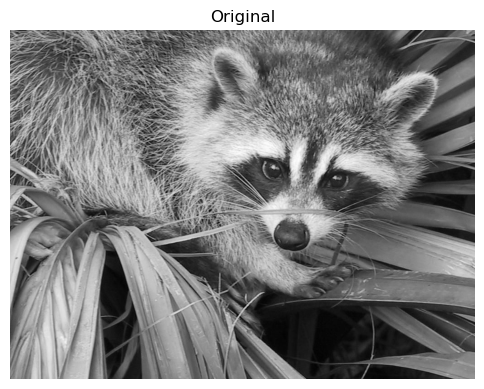

In [142]:
fig, ax_orig = plt.subplots(1, 1, figsize=(6, 15))
ax_orig.imshow(face, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
plt.show()

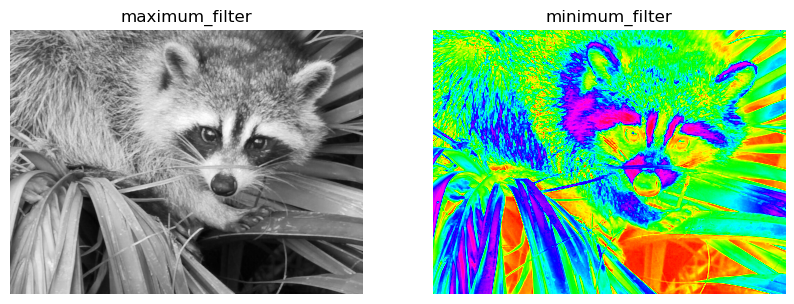

In [144]:
fig, (ax_mag, ax_ang) = plt.subplots(1, 2, figsize=(10, 10))
ax_mag.imshow(maximum_filter(face, footprint=np.ones((3,3))), cmap='gray')
ax_mag.set_title('maximum_filter')
ax_mag.set_axis_off()
ax_ang.imshow(minimum_filter(face, footprint=np.ones((3,3))), cmap='hsv') # hsv is cyclic, like angles
ax_ang.set_title('minimum_filter')
ax_ang.set_axis_off()
plt.show()
